## Library

In [ ]:
import pandas as pd
import re
from string import punctuation

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stop_words = stopwords.words('indonesian')
factory = StemmerFactory()
stemmer = factory.create_stemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1. Please find out dataset contained free text (twitter) data in Indonesia and do text preprocessing steps including case folding, non alphanumeric characters, stopword removing (minimal)

### a. Dataset
Data set yang dipakai adalah data set twitter mengenai opini film

In [ ]:
df = pd.read_csv('dataset_tweet_sentiment_pilkada_DKI_2017.csv')
df.head()

,Id,Sentiment,Pasangan Calon,Text Tweet
0,1,negative,Agus-Sylvi,Banyak akun kloning seolah2 pendukung #agussil...
1,2,negative,Agus-Sylvi,#agussilvy bicara apa kasihan yaa...lap itu ai...
2,3,negative,Agus-Sylvi,Kalau aku sih gak nunggu hasil akhir QC tp lag...
3,4,negative,Agus-Sylvi,Kasian oh kasian dengan peluru 1milyar untuk t...
4,5,negative,Agus-Sylvi,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...


### b. Case Folding

Case folding adalah salah satu bentuk text preprocessing yang paling sederhana dan efektif meskipun sering diabaikan. Tujuan dari case folding untuk mengubah semua huruf dalam dokumen menjadi huruf kecil. Hanya huruf ‘a’ sampai ‘z’ yang diterima. Karakter selain huruf dihilangkan dan dianggap delimiter. Pada tahap ini tidak menggunakan external library apapun, kita bisa memanfaatkan modul yang tersedia di python.

### Lowercase

In [ ]:
df['Text Tweet'] = [x.lower() for x in df['Text Tweet']]

In [ ]:
df['Text Tweet'].head()

0    banyak akun kloning seolah2 pendukung #agussil...
1    #agussilvy bicara apa kasihan yaa...lap itu ai...
2    kalau aku sih gak nunggu hasil akhir qc tp lag...
3    kasian oh kasian dengan peluru 1milyar untuk t...
4    maaf ya pendukung #agussilvy..hayo dukung #ani...
Name: Text Tweet, dtype: object

### c. Removing White Space
Proses ini adalah proses menghapus spasi yang tidak diperlukan dalam kalimat supaya nantinya dalam analisa tidak dianggap menjadi suatu karakter yang unik

In [ ]:
df['Text Tweet']=[x.strip() for x in df['Text Tweet']]

In [ ]:
df['Text Tweet'].head()

0    banyak akun kloning seolah2 pendukung #agussil...
1    #agussilvy bicara apa kasihan yaa...lap itu ai...
2    kalau aku sih gak nunggu hasil akhir qc tp lag...
3    kasian oh kasian dengan peluru 1milyar untuk t...
4    maaf ya pendukung #agussilvy..hayo dukung #ani...
Name: Text Tweet, dtype: object

### d. Tokenisasi
Tokenisasi adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token.

In [ ]:
df['Text Tweet'] = [x.split() for x in df['Text Tweet']]

In [ ]:
df['Text Tweet']

0      [banyak, akun, kloning, seolah2, pendukung, #a...
1      [#agussilvy, bicara, apa, kasihan, yaa...lap, ...
2      [kalau, aku, sih, gak, nunggu, hasil, akhir, q...
3      [kasian, oh, kasian, dengan, peluru, 1milyar, ...
4      [maaf, ya, pendukung, #agussilvy..hayo, dukung...
                             ...                        
895    [kali, saja, bpk, @aniesbaswedan, @sandiuno, l...
896    [kita, harus, dapat, merangkul, semua, orang, ...
897    [ini, jagoanku, dibidang, digital, <smiling, f...
898            [#pesanbijak, #okeoce, #gubernurgu3, ...]
899    [sandiaga:, bangun, rumah, dp, 0%, lebih, simp...
Name: Text Tweet, Length: 900, dtype: object

### e. Removing Non-Alphanumeric Character

Non-alphanumeric characters comprise of all the characters except alphabets and numbers. It can be punctuation characters like exclamation mark(!), at symbol(@), commas(, ), question mark(?), colon(:), dash(-) etc and special characters like dollar sign($), equal symbol(=), plus sign(+), apostrophes(‘). 

In [ ]:
#remove punctuation 

remove_table = str.maketrans("", "", punctuation)
nonpunctuation_stc = []
for stc in df['Text Tweet']:
    words = [x.translate(remove_table) for x in stc]
    words2 = []
    for w in words:
        w = [x for x in w if x.isalnum()]
        w = "".join(w)
        words2.append(w)
    
    nonpunctuation_stc.append(words2) 
    
    
    
df['Text Tweet'] = nonpunctuation_stc

In [ ]:
df['Text Tweet'].head()

0    [banyak, akun, kloning, seolah2, pendukung, ag...
1    [agussilvy, bicara, apa, kasihan, yaalap, itu,...
2    [kalau, aku, sih, gak, nunggu, hasil, akhir, q...
3    [kasian, oh, kasian, dengan, peluru, 1milyar, ...
4    [maaf, ya, pendukung, agussilvyhayo, dukung, a...
Name: Text Tweet, dtype: object

In [ ]:
df['Text Tweet'][0]

['banyak',
 'akun',
 'kloning',
 'seolah2',
 'pendukung',
 'agussilvy',
 'mulai',
 'menyerang',
 'paslon',
 'aniessandi',
 'dengan',
 'opini',
 'dan',
 'argumen',
 'pmbenaranjangan',
 'terkecoh']

### d. Stopword Removing

Stopword Removing adalah tahap mengambil kata-kata penting dari hasil token dengan menggunakan algoritma stoplist (membuang kata kurang penting) atau wordlist (menyimpan kata penting).

Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll. Makna di balik penggunaan stopword yaitu dengan menghapus kata-kata yang memiliki informasi rendah dari sebuah teks, kita dapat fokus pada kata-kata penting sebagai gantinya.

#### d.1 Using Stopwords Indonesian

Before Stopwording using Stopwords Indonesian

In [ ]:
len(df['Text Tweet'][0])

16

In [ ]:
# remove stopwords using Stopwords Indonesian

nonstop_words = []

for stc in df['Text Tweet']:
    words = [x for x in stc if x not in stop_words]
    
    nonstop_words.append(words)
df['StopwordsIndonesian']= nonstop_words



In [ ]:
df['StopwordsIndonesian']

0      [akun, kloning, seolah2, pendukung, agussilvy,...
1      [agussilvy, bicara, kasihan, yaalap, air, mata...
2      [sih, gak, nunggu, hasil, qc, tp, nunggu, moti...
3      [kasian, oh, kasian, peluru, 1milyar, rw, agus...
4      [maaf, ya, pendukung, agussilvyhayo, dukung, a...
                             ...                        
895    [kali, bpk, aniesbaswedan, sandiuno, lihat, rs...
896    [merangkul, orang, batas, usia, kelamin, okeoc...
897    [jagoanku, dibidang, digital, smiling, face, w...
898                  [pesanbijak, okeoce, gubernurgu3, ]
899    [sandiaga, bangun, rumah, dp, 0, simpel, diban...
Name: StopwordsIndonesian, Length: 900, dtype: object

After Stopwording using Stopwords Indonesian

In [ ]:
len(df['StopwordsIndonesian'][0])

12

Join all words in StopwordsIndonesia into one sentence

In [ ]:
df['StopwordsIndonesian'] = [" ".join(x) for x in df['StopwordsIndonesian']]
df['StopwordsIndonesian']

0      akun kloning seolah2 pendukung agussilvy menye...
1      agussilvy bicara kasihan yaalap air matanya wk...
2      sih gak nunggu hasil qc tp nunggu motif cuitan...
3      kasian oh kasian peluru 1milyar rw agussilvy m...
4      maaf ya pendukung agussilvyhayo dukung aniessa...
                             ...                        
895    kali bpk aniesbaswedan sandiuno lihat rspun se...
896    merangkul orang batas usia kelamin okeoce ok h...
897    jagoanku dibidang digital smiling face with su...
898                       pesanbijak okeoce gubernurgu3 
899    sandiaga bangun rumah dp 0 simpel dibanding to...
Name: StopwordsIndonesian, Length: 900, dtype: object

#### d.2 Using Stopwords Indonesian + Sastrawi

In [ ]:
df['Text Tweet']

0      [banyak, akun, kloning, seolah2, pendukung, ag...
1      [agussilvy, bicara, apa, kasihan, yaalap, itu,...
2      [kalau, aku, sih, gak, nunggu, hasil, akhir, q...
3      [kasian, oh, kasian, dengan, peluru, 1milyar, ...
4      [maaf, ya, pendukung, agussilvyhayo, dukung, a...
                             ...                        
895    [kali, saja, bpk, aniesbaswedan, sandiuno, lih...
896    [kita, harus, dapat, merangkul, semua, orang, ...
897    [ini, jagoanku, dibidang, digital, smiling, fa...
898                  [pesanbijak, okeoce, gubernurgu3, ]
899    [sandiaga, bangun, rumah, dp, 0, lebih, simpel...
Name: Text Tweet, Length: 900, dtype: object

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import pandas as pd

factory = StopWordRemoverFactory()
stopwordSastrawi = factory.get_stop_words()

print(stopwordSastrawi[:10])

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua']


In [ ]:
len(stopwordSastrawi)

126

In [ ]:
#Stopwords Indonesian from nltk library
print(stop_words[:10])

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir']


In [ ]:
len(stop_words)

758

In [ ]:
#Combine the Stopword from nltk and sastrawi library
StopwordIndonesianSastrawi = stop_words + stopwordSastrawi

In [ ]:
print(StopwordIndonesianSastrawi[:10])

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir']


In [ ]:
len(StopwordIndonesianSastrawi)

884

In [ ]:
# remove stopwords using Stopwords IndonesianSastrawi

nonstop_words_IndonesianSastrawi = []

for stc in df['Text Tweet']:
    words = [x for x in stc if x not in StopwordIndonesianSastrawi]
    
    nonstop_words_IndonesianSastrawi.append(words)
df['StopwordsIndonesianSastrawi']= nonstop_words_IndonesianSastrawi

In [ ]:
df['StopwordsIndonesianSastrawi'][0]

['akun',
 'kloning',
 'seolah2',
 'pendukung',
 'agussilvy',
 'menyerang',
 'paslon',
 'aniessandi',
 'opini',
 'argumen',
 'pmbenaranjangan',
 'terkecoh']

In [ ]:
len(df['StopwordsIndonesianSastrawi'][0])

12

Join all words in StopwordsIndonesiaSastrawi into one sentence

In [ ]:
df['StopwordsIndonesianSastrawi'] = [" ".join(x) for x in df['StopwordsIndonesianSastrawi']]
df['StopwordsIndonesianSastrawi'][0]

'akun kloning seolah2 pendukung agussilvy menyerang paslon aniessandi opini argumen pmbenaranjangan terkecoh'

In [ ]:
df['StopwordsIndonesianSastrawi'].head()

0    akun kloning seolah2 pendukung agussilvy menye...
1    agussilvy bicara kasihan yaalap air matanya wk...
2    sih gak nunggu hasil qc tp nunggu motif cuitan...
3    kasian kasian peluru 1milyar rw agussilvy memp...
4    maaf pendukung agussilvyhayo dukung aniessandi...
Name: StopwordsIndonesianSastrawi, dtype: object

### e. Stemming
Proses membuang imbuhan dalam suatu kata sehingga kata yang dihasilkan merupakan kata dasar

In [ ]:
df['Stemming text'] = [stemmer.stem(x) for x in df['StopwordsIndonesianSastrawi']]

In [ ]:
df.head()

,Id,Sentiment,Pasangan Calon,Text Tweet,StopwordsIndonesian,StopwordsIndonesianSastrawi,Stemming text
0,1,negative,Agus-Sylvi,"[banyak, akun, kloning, seolah2, pendukung, ag...",akun kloning seolah2 pendukung agussilvy menye...,akun kloning seolah2 pendukung agussilvy menye...,akun kloning seolah2 dukung agussilvy serang p...
1,2,negative,Agus-Sylvi,"[agussilvy, bicara, apa, kasihan, yaalap, itu,...",agussilvy bicara kasihan yaalap air matanya wk...,agussilvy bicara kasihan yaalap air matanya wk...,agussilvy bicara kasihan yaalap air mata wkwkwkwk
2,3,negative,Agus-Sylvi,"[kalau, aku, sih, gak, nunggu, hasil, akhir, q...",sih gak nunggu hasil qc tp nunggu motif cuitan...,sih gak nunggu hasil qc tp nunggu motif cuitan...,sih gak nunggu hasil qc tp nunggu motif cuit s...
3,4,negative,Agus-Sylvi,"[kasian, oh, kasian, dengan, peluru, 1milyar, ...",kasian oh kasian peluru 1milyar rw agussilvy m...,kasian kasian peluru 1milyar rw agussilvy memp...,kasi kasi peluru 1milyar rw agussilvy mempan m...
4,5,negative,Agus-Sylvi,"[maaf, ya, pendukung, agussilvyhayo, dukung, a...",maaf ya pendukung agussilvyhayo dukung aniessa...,maaf pendukung agussilvyhayo dukung aniessandi...,maaf dukung agussilvyhayo dukung aniessandi pu...


## 2. Please do feature extraction with Bag of words and Tf-Idf techniques

### a). Feature extraction

#### a).1 Using BagofWords Count Vectorizer

Bag of words is a Natural Language Processing technique of text modelling. In technical terms, we can say that it is a method of feature extraction with text data. This approach is a simple and flexible way of extracting features from documents.

A bag of words is a representation of text that describes the occurrence of words within a document. We just keep track of word counts and disregard the grammatical details and the word order. It is called a “bag” of words because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

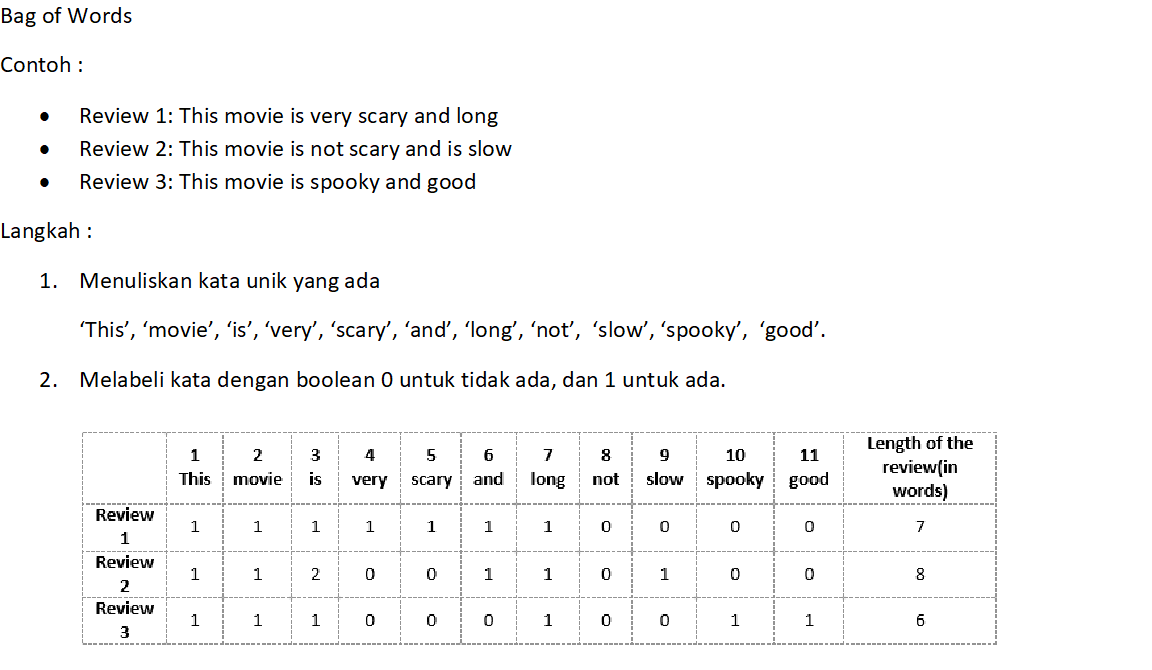


#### EXAMPLE

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
 
sentence_1="This is a good job.I will not miss it for anything"
sentence_2="This is not good at all"
 
 
 
CountVec = CountVectorizer(ngram_range=(1,1), # to use bigrams ngram_range=(2,2)
                           stop_words='english')
#transform
Count_data = CountVec.fit_transform([sentence_1,sentence_2])
 
#create dataframe
cv_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names())
print(cv_dataframe)

   good  job  miss
0     1    1     1
1     1    0     0


#### Applied to df['StopwordsIndonesianSastrawi']

In [ ]:
bow = CountVectorizer()

#transform
X_sentence = bow.fit_transform(df['StopwordsIndonesianSastrawi'])
X_sentence_df= pd.DataFrame(X_sentence.toarray(), columns = bow.get_feature_names())

In [ ]:
X_sentence_df

,002,011010,07,0rp,100,1000,1000lilin,112,12,13,1435,151,17,19,19april2017,1kenape,1milyar,1milyarrw,200000,2016,2017,20172022,2018,2019,23,25x,2600,28,2mesti,2putaran,300,30th,350jt,3hari,3x,3ya3,4000,42,52,5796,...,wiiih,wilayah,wingstourinjakarta,wirausaha,wisata,wisdom,with,without,wkwkwk,wkwkwkface,wkwkwkwk,wkwkwkwkkwkk,wpap,yaa,yaaa,yaaaa,yaalap,yah,yahudi,yak,yangbikinberantem,yasaveahok,ye,yee1dan3,yep,yes,yg,yme,ynwa,youtube,youtubebxrzd69u61a,yra,yudhoyono,yuk,yusuf,zalim,zarazettirazr,zarazettirazz,zippermouth,zona
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
896,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
898,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### b. TF-IDF

Algoritma TF-IDF (Term Frequency – Inverse Document Frequency) adalah salah satu algoritma yang dapat digunakan untuk menganalisa hubungan antara sebuah frase/kalimat dengan sekumpulan dokumen. Contoh yang dibahas kali ini adalah mengenai penentuan urutan peringkat data berdasarkan query yang digunakan.
Inti utama dari algoritma ini adalah melakukan perhitungan nilai TF dan nilai IDF dari sebuah setiap kata kunci terhadap masing-masing dokumen. Nilai TF dihitung dengan rumus

**TF = jumlah frekuensi kata terpilih / jumlah kata**

dan nilai IDF dihitung dengan rumus 

**IDF = log(jumlah dokumen / jumlah frekuensi kata terpilih)**

Selanjutnya adalah melakukan perkalian antara nilai TF dan IDF untuk mendapatkan jawaban akhir.

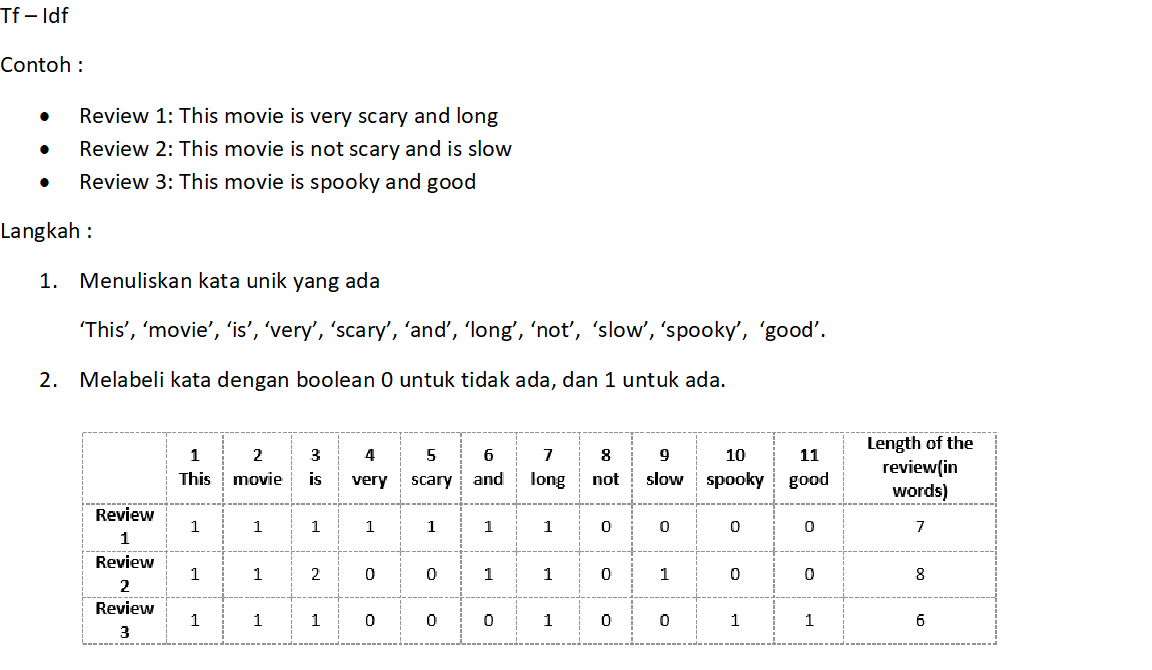

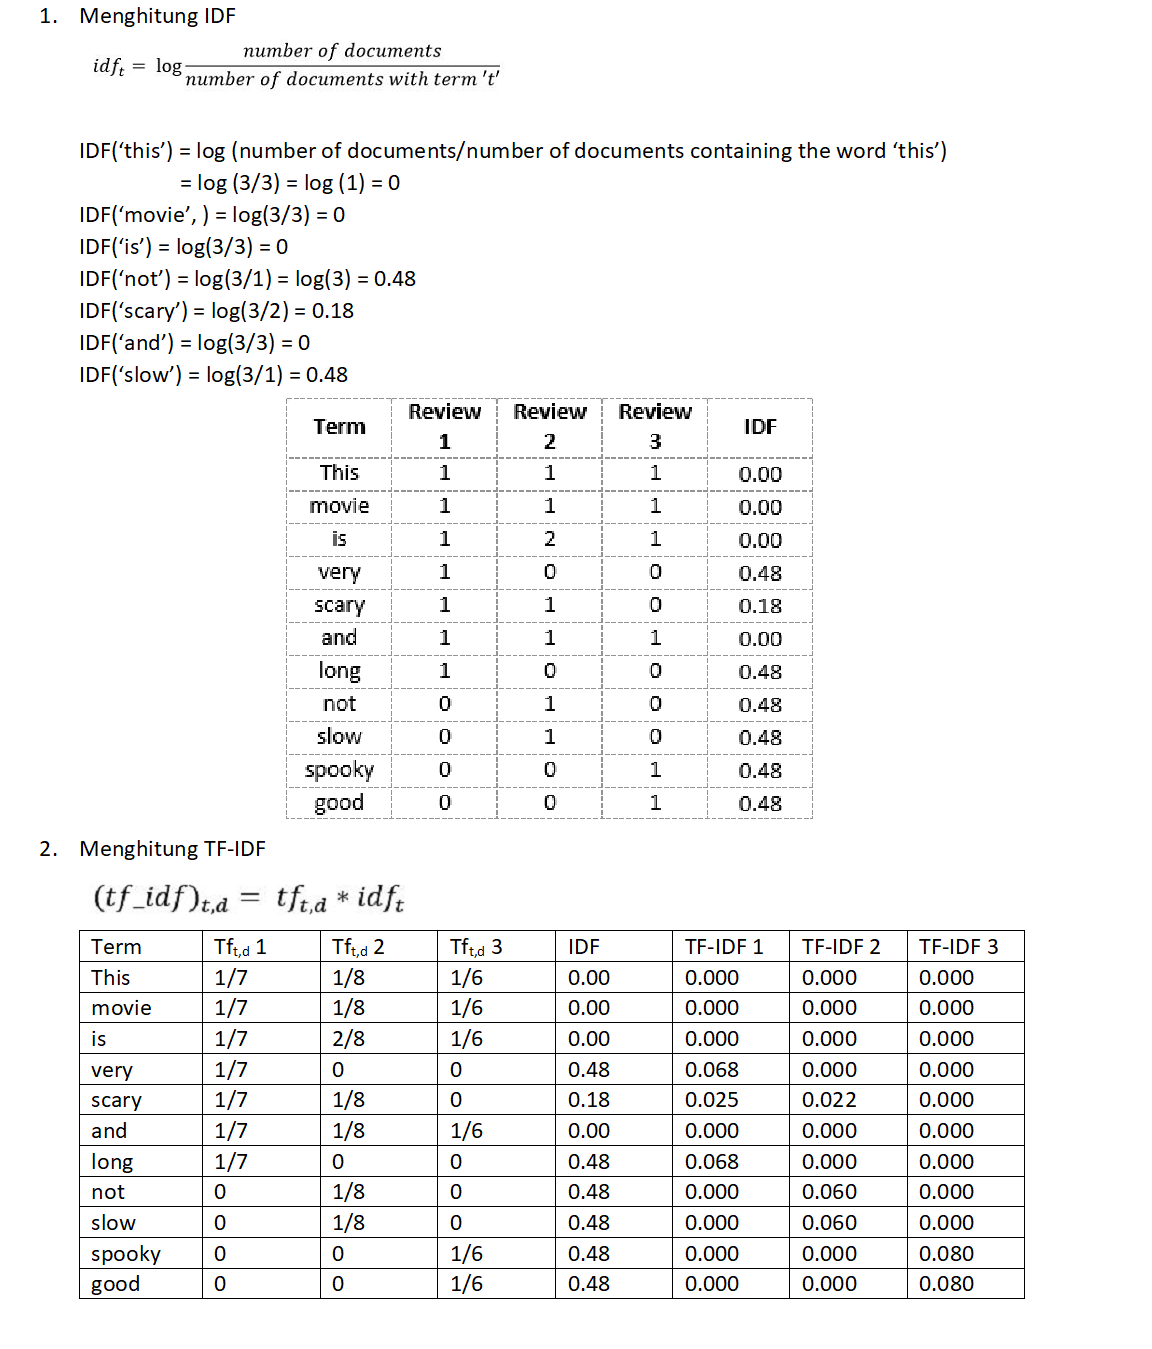

In [ ]:
# TfidfVectorizer

tfidf = TfidfVectorizer()
X2_sentence = tfidf.fit_transform(df['StopwordsIndonesianSastrawi'])

In [ ]:
X2_sentence_df = pd.DataFrame(X2_sentence.toarray(), columns = tfidf.get_feature_names())

In [ ]:
X2_sentence_df

,002,011010,07,0rp,100,1000,1000lilin,112,12,13,1435,151,17,19,19april2017,1kenape,1milyar,1milyarrw,200000,2016,2017,20172022,2018,2019,23,25x,2600,28,2mesti,2putaran,300,30th,350jt,3hari,3x,3ya3,4000,42,52,5796,...,wiiih,wilayah,wingstourinjakarta,wirausaha,wisata,wisdom,with,without,wkwkwk,wkwkwkface,wkwkwkwk,wkwkwkwkkwkk,wpap,yaa,yaaa,yaaaa,yaalap,yah,yahudi,yak,yangbikinberantem,yasaveahok,ye,yee1dan3,yep,yes,yg,yme,ynwa,youtube,youtubebxrzd69u61a,yra,yudhoyono,yuk,yusuf,zalim,zarazettirazr,zarazettirazz,zippermouth,zona
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.419798,0.0,0.0,0.0,0.0,0.0,0.419798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.206831,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3. Please do exploration about POS-Tagging and NER, make your own summary

### 3.a Part of Speech - Tagging
Proses untuk mengklasifikasikan atau mengelompokkan dan memberi label kata-kata  sesuai dengan kelas katanya (subjek, kata benda, kata kerja, dll) <br>
Library nltk mempunyai label atau lebih dikenal dengan tagset tersendiri, salah satunya ada seperti ini

In [ ]:
nltk.download('tagsets')
nltk.help.upenn_tagset()

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je j

Selain itu, terdapat juga tagset yang universal dimana tagset ini biasa kita lihat 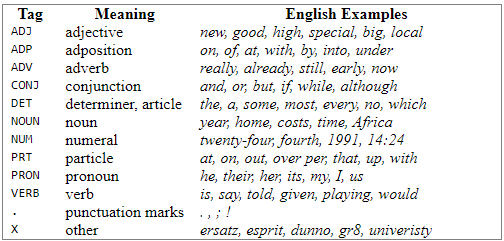

Contoh Penggunaan POS-Tagging dalam kalimat bahasa inggris

In [2]:
import nltk
from nltk import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data] Error downloading 'averaged_perceptron_tagger' from
[nltk_data]     <https://raw.githubusercontent.com/nltk/nltk_data/gh-p
[nltk_data]     ages/packages/taggers/averaged_perceptron_tagger.zip>:
[nltk_data]     [WinError 10053] An established connection was aborted
[nltk_data]     by the software in your host machine


False

In [ ]:
T = 'I am currently learning NLP in English, but if possible I want to know NLP in Indonesian language too'

nltk_tokens = nltk.word_tokenize(T)
print(nltk.pos_tag(nltk_tokens))

[('I', 'PRP'), ('am', 'VBP'), ('currently', 'RB'), ('learning', 'VBG'), ('NLP', 'NNP'), ('in', 'IN'), ('English', 'NNP'), (',', ','), ('but', 'CC'), ('if', 'IN'), ('possible', 'JJ'), ('I', 'PRP'), ('want', 'VBP'), ('to', 'TO'), ('know', 'VB'), ('NLP', 'NNP'), ('in', 'IN'), ('Indonesian', 'JJ'), ('language', 'NN'), ('too', 'RB')]


Untuk keperluan pembelajaran, akan digunakan POS-tagging dengan library nltk yang berbahasa inggris pada data set twitter berbahasa Indonesia yang memungkinkan hasil tag kurang tepat

In [ ]:
postagging = df['StopwordsIndonesianSastrawi'].str.split().map(pos_tag)
postagging.head()

0    [(akun, NN), (kloning, VBG), (seolah2, JJ), (p...
1    [(agussilvy, NN), (bicara, NN), (kasihan, NN),...
2    [(sih, NN), (gak, NN), (nunggu, JJ), (hasil, N...
3    [(kasian, JJ), (kasian, JJ), (peluru, NN), (1m...
4    [(maaf, NN), (pendukung, NN), (agussilvyhayo, ...
Name: StopwordsIndonesianSastrawi, dtype: object

In [ ]:
def count_tags(title_with_tags):
    tag_count = {}
    for word, tag in title_with_tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
    return(tag_count)
postagging.map(count_tags).head()

0    {'NN': 7, 'VBG': 1, 'JJ': 1, 'IN': 1, 'NNS': 1...
1                                  {'NN': 6, 'NNP': 1}
2                          {'NN': 7, 'JJ': 1, 'FW': 6}
3                {'JJ': 2, 'NN': 7, 'CD': 1, 'VBP': 1}
4                         {'NN': 7, 'VBD': 1, 'CD': 1}
Name: StopwordsIndonesianSastrawi, dtype: object

In [ ]:
postagging_df = pd.DataFrame(postagging)
postagging_df['tag_counts'] = postagging_df.head()['StopwordsIndonesianSastrawi'].map(count_tags)
postagging_df.head()

,StopwordsIndonesianSastrawi,tag_counts
0,"[(akun, NN), (kloning, VBG), (seolah2, JJ), (p...","{'NN': 7, 'VBG': 1, 'JJ': 1, 'IN': 1, 'NNS': 1..."
1,"[(agussilvy, NN), (bicara, NN), (kasihan, NN),...","{'NN': 6, 'NNP': 1}"
2,"[(sih, NN), (gak, NN), (nunggu, JJ), (hasil, N...","{'NN': 7, 'JJ': 1, 'FW': 6}"
3,"[(kasian, JJ), (kasian, JJ), (peluru, NN), (1m...","{'JJ': 2, 'NN': 7, 'CD': 1, 'VBP': 1}"
4,"[(maaf, NN), (pendukung, NN), (agussilvyhayo, ...","{'NN': 7, 'VBD': 1, 'CD': 1}"


### 3.b Named Entity Recognition (NER)
NER adalah teknik NLP to mengidentifikasi entitas dari teks dalam kelompok/tipe tertentu, seperti orang, lokasi, organisasi, dll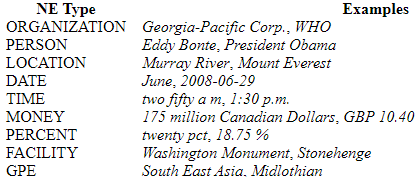

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

Berikut contoh NER jika diterapkan dalam sebuah kalimat bahasa inggris dengan menggunakan library nltk

In [ ]:
sentence = "WASHINGTON -- In the wake of a string of abuses by New York police officers in the 1990s, Loretta E. Lynch, the top federal prosecutor in Brooklyn, spoke forcefully about the pain of a broken trust that African-Americans felt and said the responsibility for repairing generations of miscommunication and mistrust fell to law enforcement."

# Step Three: Tokenise, find parts of speech and chunk words 

for sent in nltk.sent_tokenize(sentence):
  for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
     if hasattr(chunk, 'label'):
        print(chunk.label(), ' '.join(c[0] for c in chunk))

GPE WASHINGTON
GPE New York
PERSON Loretta E. Lynch
GPE Brooklyn
